In [ ]:
# menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mengimport dataset gambar
import zipfile
#path ke zip file
zip_file_path = '/content/drive/MyDrive/imagess.zip'

# extract ke direktori images
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

Failed to read image file: /content/imagess/Train/Kol (43).xml
Failed to read image file: /content/imagess/Train/SawiNew (7).xml
Failed to read image file: /content/imagess/Train/SawiNew (12).xml


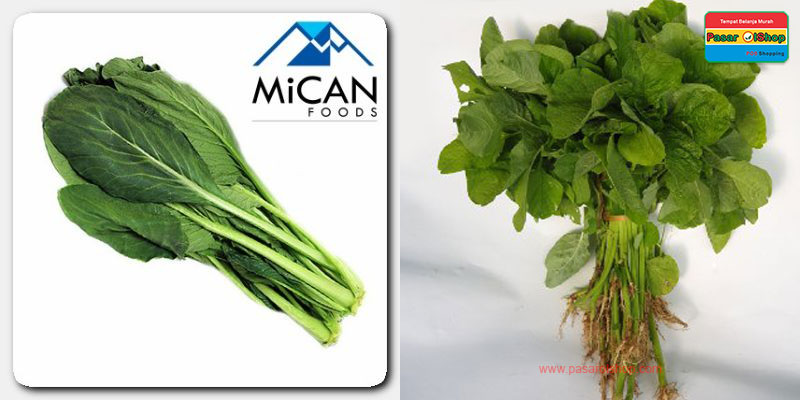

In [ ]:
import os
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Mendapatkan path folder citra pada dataset
image_folder = '/content/imagess/Train'

# Mendapatkan daftar nama file citra
image_files = os.listdir(image_folder)

# Memilih beberapa contoh citra untuk ditampilkan
num_examples = 5
selected_images = image_files[:num_examples]

# Menampilkan citra ke samping menggunakan OpenCV
images = []
for image_file in selected_images:
    image_path = os.path.join(image_folder, image_file)

    # Mengecek apakah file citra valid
    if not os.path.isfile(image_path):
        print(f"Invalid image file: {image_path}")
        continue

    # Membaca citra
    image = cv2.imread(image_path)

    # Mengecek apakah citra berhasil dibaca
    if image is None:
        print(f"Failed to read image file: {image_path}")
        continue

    images.append(image)

# Menggabungkan citra secara horizontal
combined_image = np.hstack(images)

# Menampilkan citra
cv2_imshow(combined_image)

cv2.destroyAllWindows()


In [ ]:
# clone model tensorflow dari github
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3909, done.
remote: Counting objects: 100% (3909/3909), done.
remote: Compressing objects: 100% (3015/3015), done.
remote: Total 3909 (delta 1129), reused 1997 (delta 841), pack-reused 0
Receiving objects: 100% (3909/3909), 49.65 MiB | 31.60 MiB/s, done.
Resolving deltas: 100% (1129/1129), done.


In [ ]:
# masuk ke direktori model
%cd models/research

/content/models/research


In [ ]:
# konfigurasi model objec detection
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# menset-up model object detection
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [ ]:
# Install  Object Detection API
!pip install /content/models/research/

# downgrade tensorflow
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 24.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.7 MB/s eta 0:00:00
  Pr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 49.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.1
    Uninstalling tensorflow-2.8.1:
      Successfully uninstalled tensorflow-2.8.1


In [ ]:
# kembali ke direktori awal
%cd ..

/content/models


In [ ]:
# kembali ke direktori awal
%cd ..

/content


In [ ]:
# membuat labelmap
%%bash
cat <<EOF >> /content/labelmap.txt
Bayam
Cabai
Kangkung
Kentang
Kol
Sawi
Seledri
Tomat
Wortel
EOF

In [ ]:
# Mendownload conversion scripts
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
! wget https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py

--2023-06-13 11:01:12--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348 (1.3K) [text/plain]
Saving to: ‘create_csv.py’

create_csv.py       100%[===================>]   1.32K  --.-KB/s    in 0s      

2023-06-13 11:01:13 (50.3 MB/s) - ‘create_csv.py’ saved [1348/1348]

--2023-06-13 11:01:13--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
# membuat CSV data files dan TFRecord files
!python3 create_csv.py
!python3 create_tfrecord.py --csv_input=imagess/Train_labels.csv --labelmap=labelmap.txt --image_dir=imagess/Train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=imagess/Test_labels.csv --labelmap=labelmap.txt --image_dir=imagess/Test --output_path=test.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
Successfully created the TFRecords: /content/train.tfrecord
Successfully created the TFRecords: /content/test.tfrecord


In [ ]:
#setup training config
chosen_model = 'ssd-mobilenet-v2-fpnlite-320'

MODELS_CONFIG = {
    'ssd-mobilenet-v2-fpnlite-320': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
    }
}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [ ]:
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file untuk model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/mymodel
--2023-06-13 11:03:38--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.200.128, 2607:f8b0:4001:c16::80
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.200.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  89.7MB/s    in 0.2s    

2023-06-13 11:03:38 (89.7 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2023-06-13 11:03:39--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 1

In [ ]:
# Set training parameters untuk model
num_steps = 15000
batch_size = 16

In [ ]:
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
# set direktori config
CONFIG_PATH = '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
print(config)

{'model': ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 320
      width: 320
    }
  }
  feature_extractor {
    type: "ssd_mobilenet_v2_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 3.9999998989515007e-05
        }
      }
      initializer {
        random_normal_initializer {
          mean: 0.0
          stddev: 0.009999999776482582
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    use_depthwise: true
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
      additional_layer_depth: 128
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_thresh

In [ ]:
import tensorflow as tf

In [ ]:
# ubah konfigurasi model
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)
pipeline_config.model.ssd.num_classes = 9
pipeline_config.train_config.batch_size = 16
pipeline_config.train_config.fine_tune_checkpoint =  '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path= '/content/labelmap.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = ['/content/train.tfrecord']
pipeline_config.eval_input_reader[0].label_map_path = '/content/labelmap.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/content/test.tfrecord']
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:
    f.write(config_text)

In [ ]:
#set direktori
pipeline_file = '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'
model_dir = '/content/training'

In [ ]:
# Training Model
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

In [ ]:
# membuat direktori tflite
!mkdir /content/custom_model_lite
output_directory = '/content/custom_model_lite'

# membuat graph untuk tflite
last_model_path = '/content/training'
pipeline_file = '/content/models/mymodel/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config'
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

In [ ]:
# mengkonversi ke tflite
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('/content/custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
pip install tflite-support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for tflite-support: filename=tflite_support-0.1.0a1-cp310-cp310-linux_x86_64.whl size=5942352 sha256=e1743d19e24dcbd8585d8ca43a122636732137d9f093367857a7dfc4b9c99d58
  Stored in directory: /root/.cache/pip/wheels/71/5c/da/9e5e661ec26e03ee57e69428d40fffbefe3c0aff649c55776d
Successfully built tflite-support


In [ ]:
pip install tflite-support-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tflite-support-nightly (from versions: none)
ERROR: No matching distribution found for tflite-support-nightly


In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

writer = object_detector.metadata_writers.create_for_inference(
    writer.utils.load_file('/content/custom_model_lite/detect.tflite'),input_norm_mean=[0],
    input_norm_std=[225], label_file_paths=['/content/labelmap.txt'])
print(writer.get_metadata_json())
writer_utils.save_file(writer.populate(), 'Metadatamodel.tflite')

ModuleNotFoundError: ignored